# **Loading the data and other imports**

In [17]:
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [20]:
df = pd.read_csv('/content/lending_club_loan_two.csv')

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365578 entries, 0 to 365577
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             365578 non-null  float64
 1   term                  365578 non-null  object 
 2   int_rate              365578 non-null  float64
 3   installment           365578 non-null  float64
 4   grade                 365578 non-null  object 
 5   sub_grade             365578 non-null  object 
 6   emp_title             344464 non-null  object 
 7   emp_length            348713 non-null  object 
 8   home_ownership        365578 non-null  object 
 9   annual_inc            365577 non-null  float64
 10  verification_status   365577 non-null  object 
 11  issue_d               365577 non-null  object 
 12  loan_status           365577 non-null  object 
 13  purpose               365577 non-null  object 
 14  title                 363965 non-null  object 
 15  

# **Exploratory Data Analysis**

<ipython-input-23-b8b459ad608a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='bright')


<Axes: xlabel='loan_status', ylabel='count'>

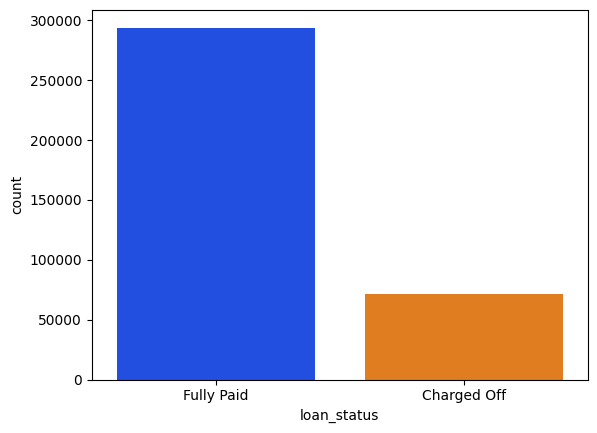

In [23]:
sns.countplot(x='loan_status', data=df, palette='bright')

(0.0, 45000.0)

<Figure size 1800x1000 with 0 Axes>

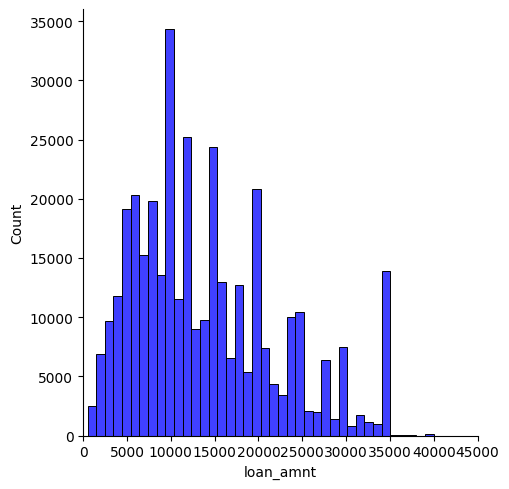

In [24]:
plt.figure(figsize=(18, 10))
plt.tight_layout()
sns.displot(df['loan_amnt'], kde=False, color='blue',  bins=40)
plt.xlim(0,45000)

In [25]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168719,0.953968,0.342758,0.016157,0.199336,-0.077209,0.329156,0.100773,0.224418,0.222247,-0.106687
int_rate,0.168719,1.000000,0.162544,-0.057419,0.076389,0.011921,0.061376,-0.010752,0.294209,-0.036343,-0.082104,0.058175
installment,0.953968,0.162544,1.000000,0.336033,0.015254,0.189637,-0.067389,0.317286,0.124597,0.202884,0.193582,-0.098678
annual_inc,0.342758,-0.057419,0.336033,1.000000,-0.080412,0.139171,-0.013376,0.304862,0.027537,0.196624,0.241148,-0.050968
dti,0.016157,0.076389,0.015254,-0.080412,1.000000,0.131823,-0.016913,0.061795,0.085494,0.098694,-0.025038,-0.014049
open_acc,0.199336,0.011921,0.189637,0.139171,0.131823,1.000000,-0.018564,0.222831,-0.130723,0.680947,0.109511,-0.028374
pub_rec,-0.077209,0.061376,-0.067389,-0.013376,-0.016913,-0.018564,1.000000,-0.101816,-0.074927,0.018888,0.011206,0.696225
revol_bal,0.329156,-0.010752,0.317286,0.304862,0.061795,0.222831,-0.101816,1.000000,0.227642,0.193055,0.195317,-0.125118
revol_util,0.100773,0.294209,0.124597,0.027537,0.085494,-0.130723,-0.074927,0.227642,1.000000,-0.103860,0.007251,-0.086531
total_acc,0.224418,-0.036343,0.202884,0.196624,0.098694,0.680947,0.018888,0.193055,-0.103860,1.000000,0.381096,0.041294


<Axes: >

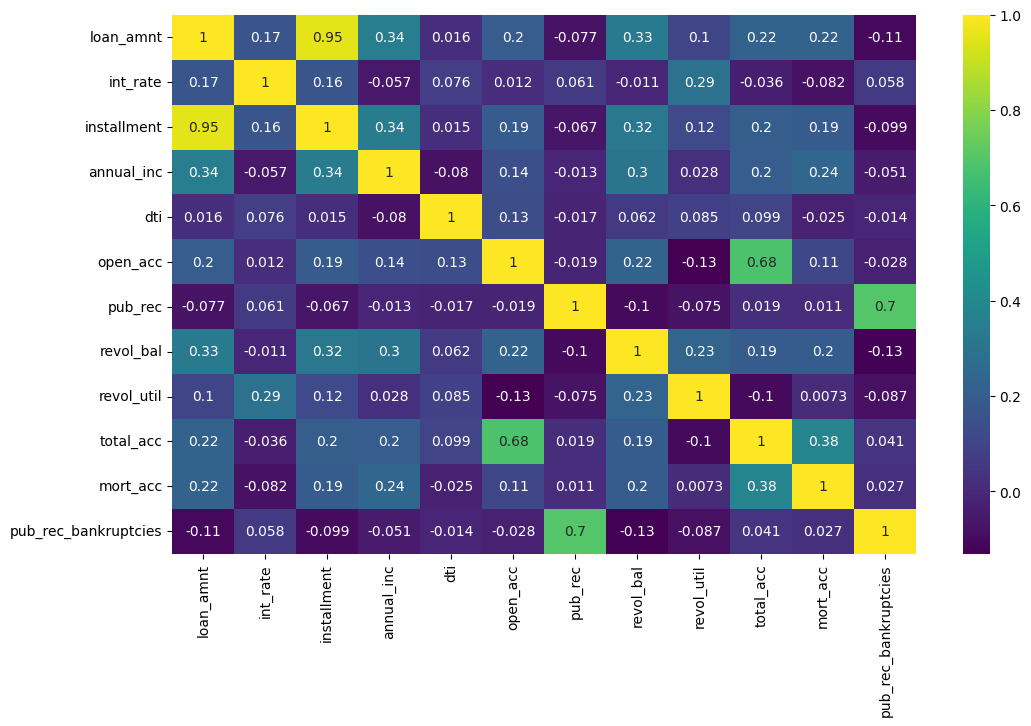

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(numeric_df.corr(),annot=True,cmap='viridis')

<Axes: xlabel='installment', ylabel='loan_amnt'>

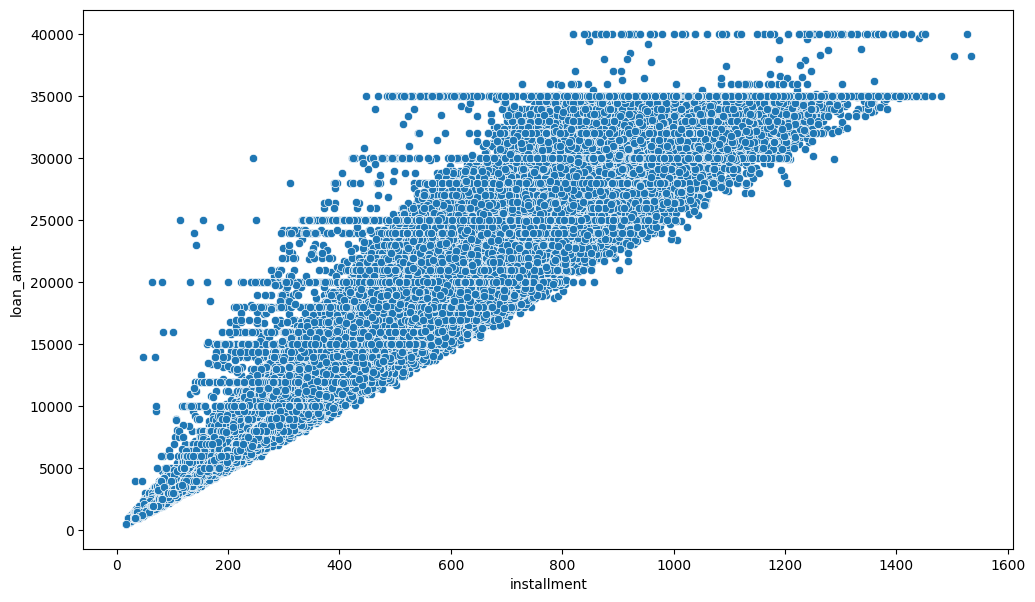

In [27]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

<ipython-input-28-74eba4886ebf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status',y='loan_amnt',data=df, palette='rainbow')


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

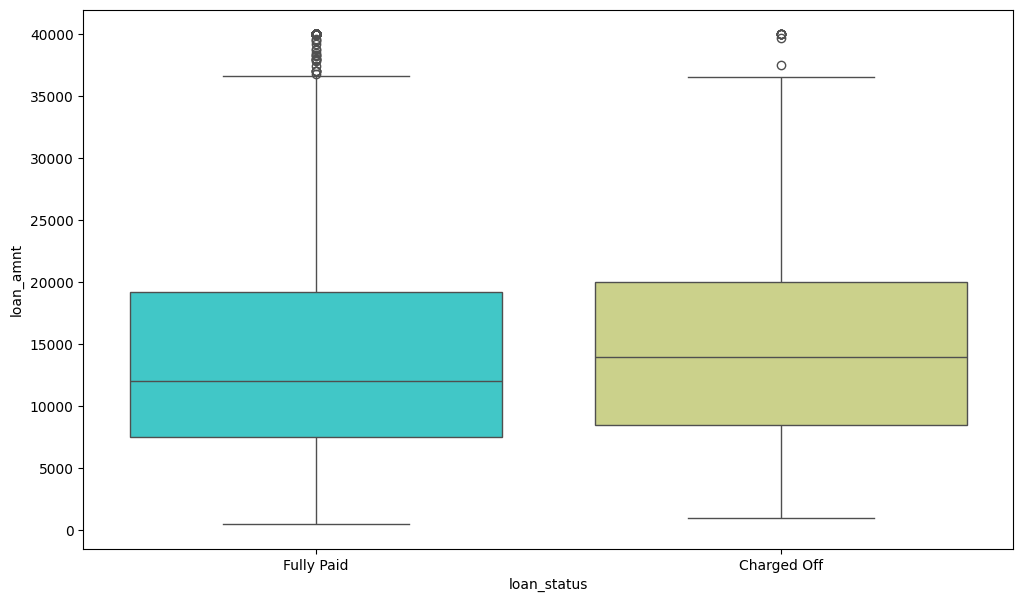

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=df, palette='rainbow')

In [29]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,71659.0,15119.254385,8507.815339,1000.0,8500.0,14000.0,20000.0,40000.0
Fully Paid,293918.0,13865.056410,8300.544902,500.0,7500.0,12000.0,19200.0,40000.0


In [30]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [31]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

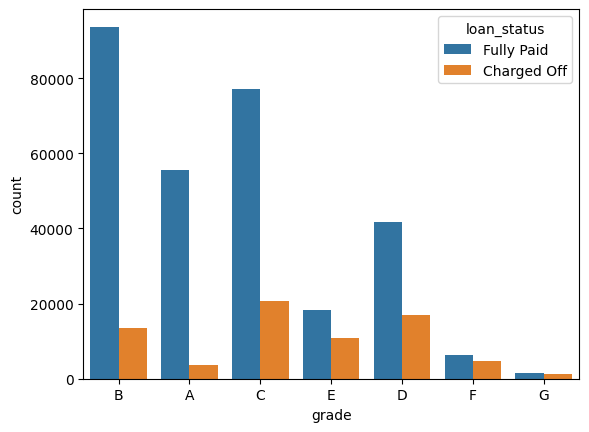

In [32]:
sns.countplot(x='grade',data=df,hue='loan_status')

<ipython-input-33-94153f42f690>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


<Axes: xlabel='sub_grade', ylabel='count'>

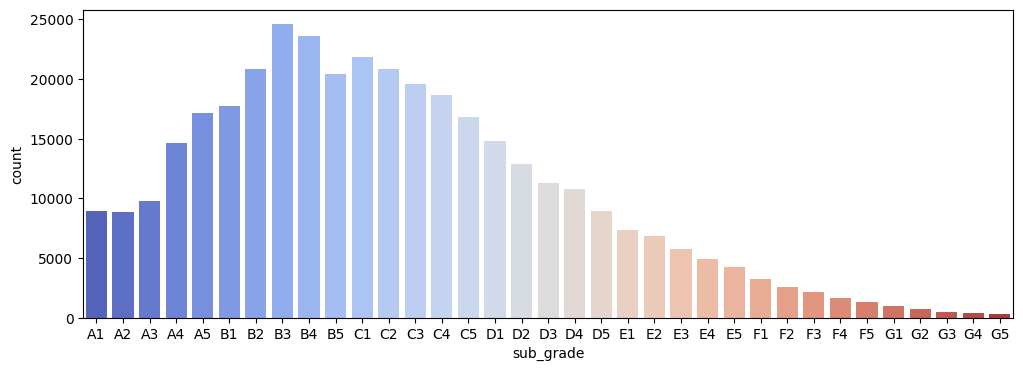

In [33]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

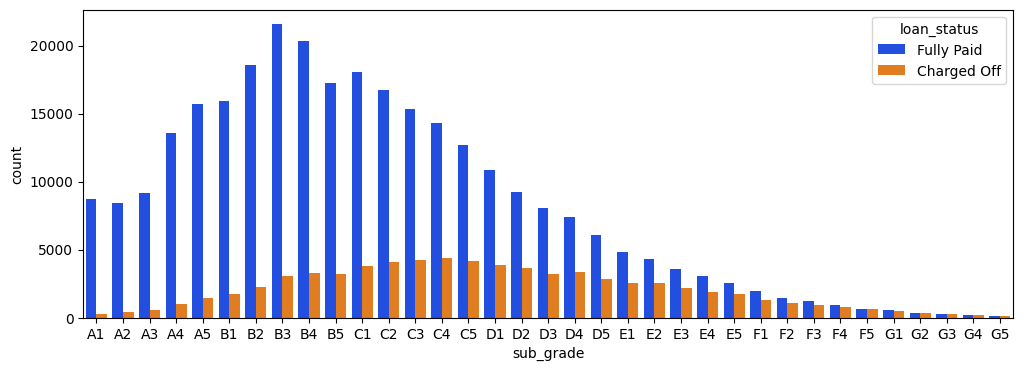

In [34]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='bright' ,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

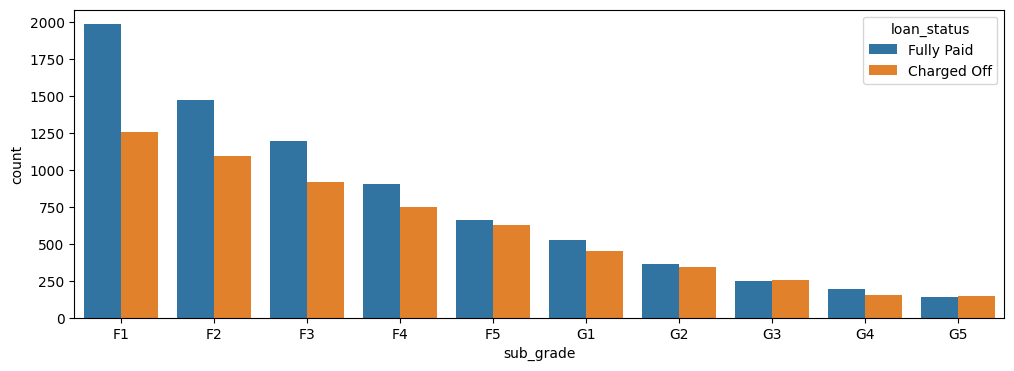

In [35]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [36]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [37]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [38]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1.0,Fully Paid
1,1.0,Fully Paid
2,1.0,Fully Paid
3,1.0,Fully Paid
4,0.0,Charged Off
...,...,...
365573,1.0,Fully Paid
365574,0.0,Charged Off
365575,1.0,Fully Paid
365576,1.0,Fully Paid


<Axes: >

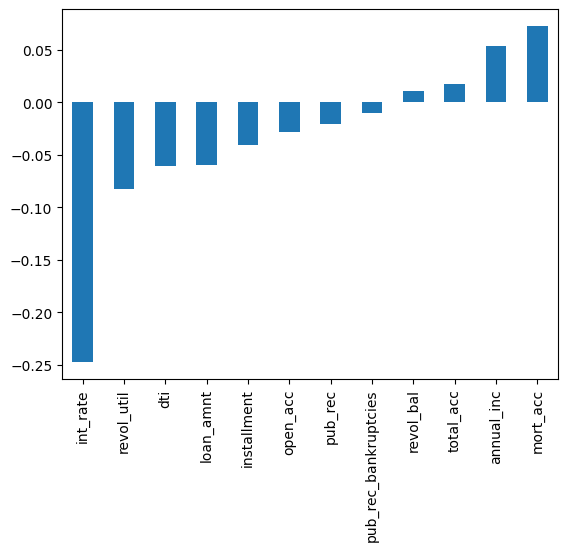

In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# **Data PreProcessing**

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0.0


In [41]:
df.shape

(365578, 28)

In [42]:
len(df)

365578

In [43]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,21114
emp_length,16865
home_ownership,0
annual_inc,1


In [44]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       'United American ', 'Service Operatopm Support', 'Dept.lead'],
      dtype=object)

In [45]:
df['emp_title'].value_counts()

,count
emp_title,
Teacher,4039
Manager,3930
Registered Nurse,1721
RN,1703
Supervisor,1683
...,...
Bridge Crew Foreman,1
Training Tech 2,1
Weber State University,1


Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [46]:
df.drop('emp_title', axis=1, inplace=True)

In [47]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [48]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<ipython-input-49-a50243a4cae2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright')


<Axes: xlabel='emp_length', ylabel='count'>

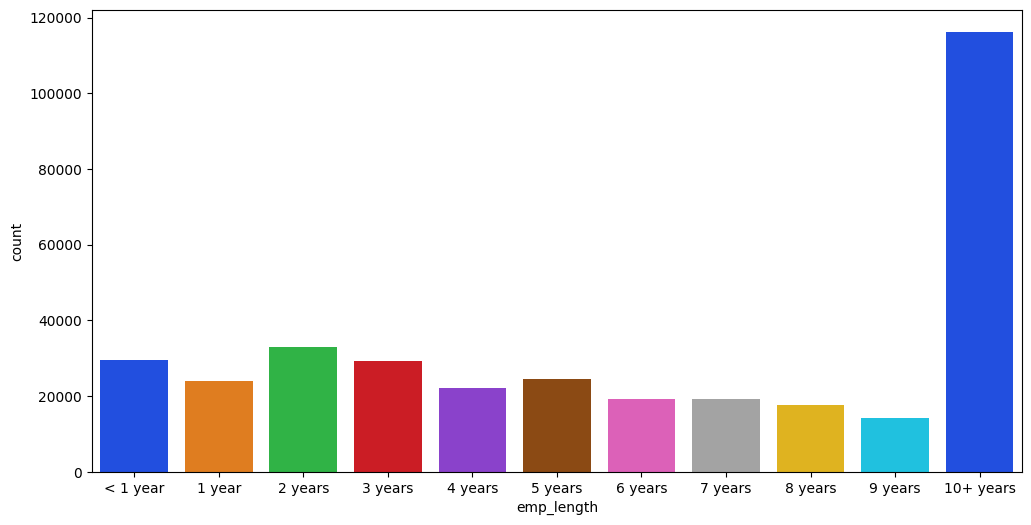

In [49]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright')

<Axes: xlabel='emp_length', ylabel='count'>

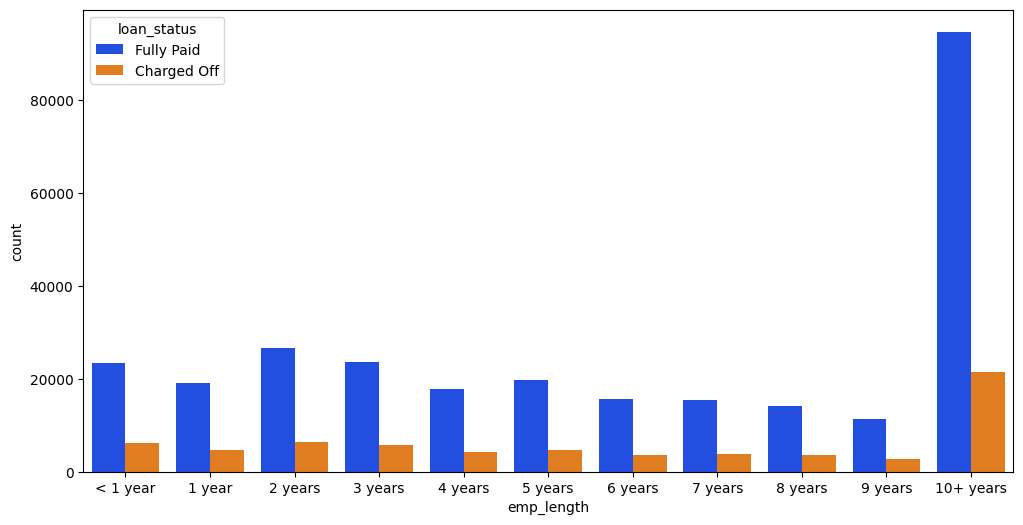

In [50]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_length',data=df,order=emp_length_order, palette='bright', hue='loan_status')

In [51]:
df = df.drop('emp_length',axis=1)

In [52]:
df['purpose'].head(10)

,purpose
0,vacation
1,debt_consolidation
2,credit_card
3,credit_card
4,credit_card
5,debt_consolidation
6,home_improvement
7,credit_card
8,debt_consolidation
9,debt_consolidation


In [53]:
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,216324
credit_card,76750
home_improvement,22251
other,19498
major_purchase,8182
small_business,5249
car,4328
medical,3869
moving,2619


In [54]:
df = df.drop('title',axis=1)

In [55]:
df['mort_acc'].value_counts()

,count
mort_acc,
0.0,128849
1.0,55735
2.0,46142
3.0,35142
4.0,25774
5.0,16801
6.0,10204
7.0,5631
8.0,2873


In [56]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()['mort_acc'].sort_values()

,mort_acc
int_rate,-0.082104
dti,-0.025038
revol_util,0.007251
pub_rec,0.011206
pub_rec_bankruptcies,0.026917
loan_repaid,0.072931
open_acc,0.109511
installment,0.193582
revol_bal,0.195317
loan_amnt,0.222247


In [57]:
# Ensure mort_acc and total_acc are numeric
df['mort_acc'] = pd.to_numeric(df['mort_acc'], errors='coerce')
df['total_acc'] = pd.to_numeric(df['total_acc'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df = df.dropna(subset=['mort_acc', 'total_acc'])

# Group by total_acc and calculate mean of mort_acc
result = df.groupby('total_acc')['mort_acc'].mean()

# Display the result
print(result)

total_acc
2.0      0.000000
3.0      0.050955
4.0      0.067332
5.0      0.101635
6.0      0.150608
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


In [58]:
result[2.0]

0.0

In [59]:
def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return result[total_acc]
    else:
        return mort_acc

In [60]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [61]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


In [62]:
df = df.dropna()

In [63]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
home_ownership,0
annual_inc,0
verification_status,0
issue_d,0


### Categorical Variables and Dummy Variables

In [64]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [65]:
df['term'].value_counts()

,count
term,
36 months,252541
60 months,77857


In [66]:
df = df.copy()
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [67]:
df['term'].value_counts()

,count
term,
36,252541
60,77857


In [68]:
df = df.drop('grade',axis=1)

In [69]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [70]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [71]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [72]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [73]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

In [74]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

In [75]:
df = pd.concat([df, dummies],axis=1)

In [76]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,167668
RENT,130583
OWN,32091
OTHER,28
NONE,25
ANY,3


In [77]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [78]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,167668
RENT,130583
OWN,32091
OTHER,56


In [79]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [80]:
df['address']

,address
0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,"823 Reid Ford\nDelacruzside, MA 00813"
4,"679 Luna Roads\nGreggshire, VA 11650"
...,...
365572,"9113 Fischer Ramp Apt. 616\nDerekburgh, AL 48052"
365573,"14991 Johnson Glen Apt. 719\nNorth Mark, AL 00813"
365574,8979 Bennett Center Apt. 596\nWest Cassandrash...
365575,"3342 Mcclain Ridges Suite 247\nEast Maria, OR ..."


In [81]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [82]:
df['zip_code'].value_counts()

,count
zip_code,
70466,47493
30723,47188
22690,47098
48052,46683
00813,37943
29597,37752
05113,37696
11650,9629
93700,9544


In [83]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [84]:
df['issue_d']

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015
3,Nov-2014
4,Apr-2013
...,...
365572,Nov-2015
365573,Apr-2013
365574,May-2014
365575,Mar-2015


In [85]:
df = df.drop('issue_d', axis=1)

In [86]:
df['earliest_cr_line']

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999
...,...
365572,Feb-1993
365573,Jun-2004
365574,Dec-1978
365575,Dec-2005


In [87]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [88]:
df = df.drop('earliest_cr_line',axis=1)

In [89]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [90]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,False,False,True,False,False,False,False,False,False,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,True,False,False,False,False,False,False,False,False,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,True,False,False,False,False,False,False,False,False,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,False,False,False,False,False,False,False,False,False,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,False,True,False,False,False,False,False,False,False,1999


In [91]:
df = df.drop('loan_status',axis=1)

In [92]:
df['loan_repaid']

,loan_repaid
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
365572,1.0
365573,1.0
365574,0.0
365575,1.0


In [93]:
df['loan_repaid'].value_counts()

,count
loan_repaid,
1.0,263936
0.0,66462


# **Train Test Split**

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## **Normalizing the Data**

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_train = scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

## **Creating the Model**

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [102]:
model = Sequential()

In [103]:
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [104]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.3732 - val_loss: 0.2686
Epoch 2/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2719 - val_loss: 0.2663
Epoch 3/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.2703 - val_loss: 0.2660
Epoch 4/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2665 - val_loss: 0.2652
Epoch 5/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.2647 - val_loss: 0.2652
Epoch 6/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.2636 - val_loss: 0.2647
Epoch 7/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2622 - val_loss: 0.2647
Epoch 8/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2631 - val_loss: 0.2650
Epoch 9/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2629 - val_loss: 0.2647
Epoch 10/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2626 - val_loss: 0.2650
Epoch 11/25
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2623 - val_loss: 0.2646
Epoch 12/25
1033/1033 ━━━━━━━

## **Evaluating Model Performance**

In [105]:
losses = pd.DataFrame(model.history.history)

<Axes: >

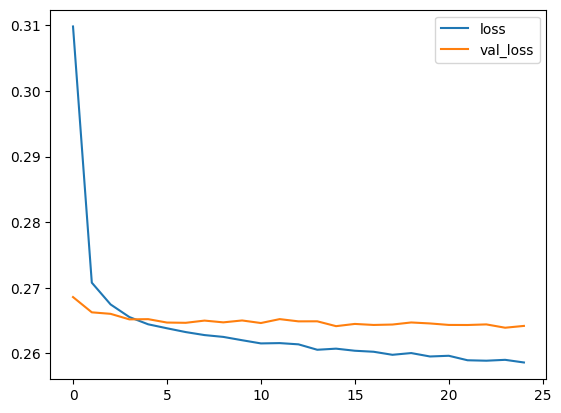

In [106]:
losses[['loss','val_loss']].plot()

In [107]:
from sklearn.metrics import classification_report,confusion_matrix

In [111]:
predictions =( model.predict(X_test) >.5)

2065/2065 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.47      0.62     13315
         1.0       0.88      0.99      0.93     52765

    accuracy                           0.88     66080
   macro avg       0.90      0.73      0.78     66080
weighted avg       0.89      0.88      0.87     66080



In [114]:
cm = confusion_matrix(y_test,predictions)

<Axes: >

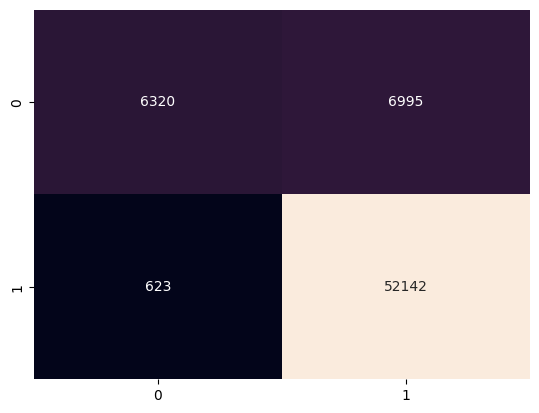

In [116]:
sns.heatmap(cm, annot=True, cbar=False, fmt='g')